In [1]:
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import os

In [2]:
ROOT_PATH = '/'.join(os.getcwd().split('/')[:-2])
DATA_PATH = f'{ROOT_PATH}/doodle/data/kakao2.csv'
FONT_PATH = f'{ROOT_PATH}/doodle/data/fonts/NanumMyeongjo.ttf'

In [3]:
font = font_manager.FontProperties(fname = FONT_PATH).get_name()
rc('font', family = font)

In [4]:
df = pd.read_csv(DATA_PATH).iloc[25611:]
df.head()

,Date,User,Message
25611,2023-03-07 01:07:46,걸우 눈나,즉시 도착
25612,2023-03-07 05:28:37,김종민,고생하셨어뉴~~
25613,2023-03-07 07:18:11,김땡꼬똥꼬,이모티콘
25614,2023-03-07 07:22:23,김땡꼬똥꼬,캐푸형코고는소리
25615,2023-03-07 07:22:33,김땡꼬똥꼬,트랙터 엔진소리


In [5]:
def change_name(df):
    
    df['User'][df['User'] == '킹갓 캐푸형아'] = '김캐푸'
    df['User'][df['User'] == '스탄 형니므']   = '손스탄'
    df['User'][df['User'] == '걸우 눈나']    = '임걸우'
    df['User'][df['User'] == '김땡꼬똥꼬']    = '김삐돌이'
    df['User'][df['User'] == '김종민']       = '김둘기'
    
    return df

In [6]:
def date_time_split(df, column):
    
    split_col = df['Date']
    if column == 'Date': df[column] = split_col.str.split(' ').str[0]

In [7]:
users     = list(change_name(df)['User'])
user_dist = Counter(users)

user_dist

Counter({'임걸우': 337, '김둘기': 420, '김삐돌이': 862, '김캐푸': 300, '손스탄': 202})

(0.0, 10000.0)

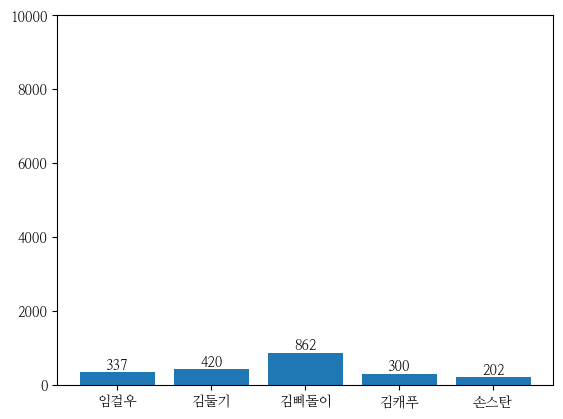

In [8]:
plt.bar(user_dist.keys(), user_dist.values())
for k, v in user_dist.items():
    
    plt.text(k, v, v, va = 'bottom', ha = 'center')
    
plt.ylim(0, 10000)

In [9]:
df['Time'] = df['Date'].str.split(' ').str[1]

In [10]:
df['Date'] = df['Date'].str.split(' ').str[0]

In [11]:
df[['Date', 'Time']]

,Date,Time
25611,2023-03-07,01:07:46
25612,2023-03-07,05:28:37
25613,2023-03-07,07:18:11
25614,2023-03-07,07:22:23
25615,2023-03-07,07:22:33
...,...,...
27727,2023-03-09,11:31:06
27728,2023-03-09,11:31:16
27729,2023-03-09,11:31:16
27730,2023-03-09,11:31:20


<BarContainer object of 23 artists>

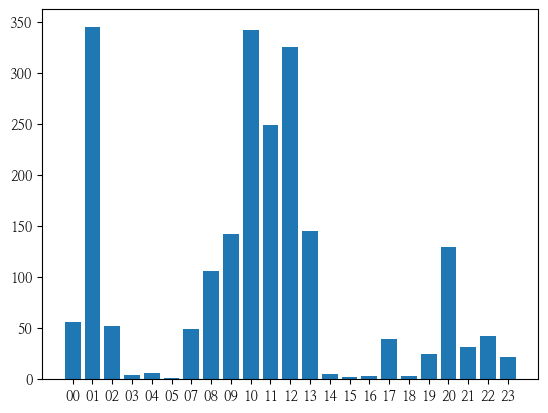

In [12]:
time_dist = dict(Counter(df['Time'].str.split(':').str[0]))
time_dist = dict(sorted(time_dist.items()))
plt.bar(time_dist.keys(), time_dist.values())

In [13]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

In [14]:
wordcloud = WordCloud(
        font_path = FONT_PATH,
        width     = 800, height = 800,
    )

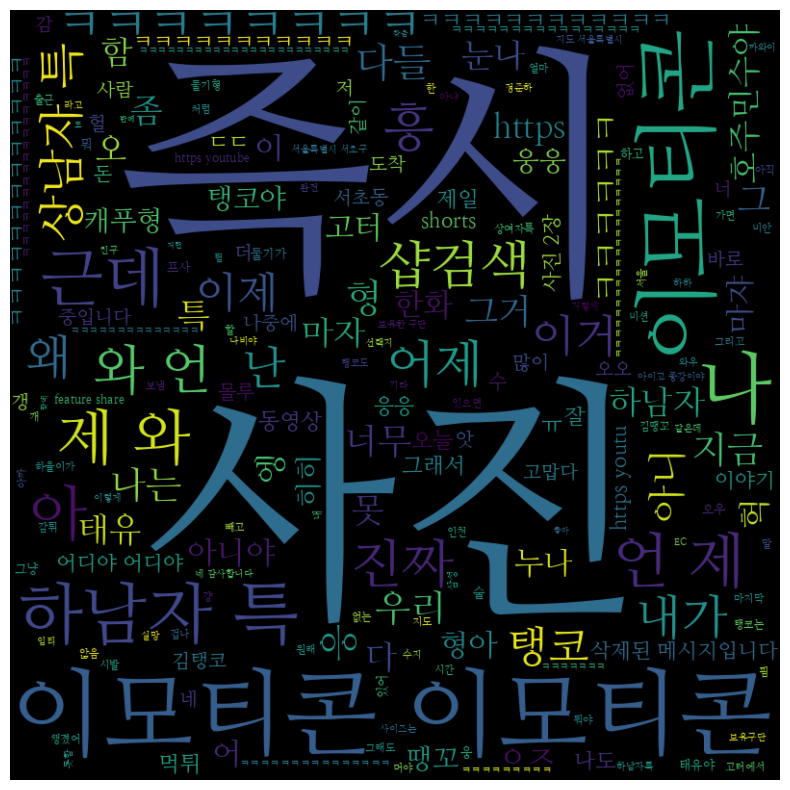

In [16]:
text    = " ".join(df['Message']).replace('이모티콘', '이모티콘')
keyword = wordcloud.generate(text)
array   = keyword.to_array()

plt.figure(figsize = (10, 10))
plt.imshow( array, interpolation='bilinear')
plt.axis(False)
plt.show()